Using models pkl file we will test scores here .


In [2]:
import joblib
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
data = pd.read_csv("finalized_preprocessed_data.csv")
X = data.drop(columns='is_fraud')
y = data['is_fraud']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Random state is constient so no data leakage into trained models and data set has always be double split X_test is fresh .


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


load models

In [7]:
lgbm = joblib.load('lgbm_model.pkl')
xgboost = joblib.load('xgboost_model.pkl')
randomforest = joblib.load('randomforest_model.pkl')
y_predlgbm = lgbm.predict(X_test)
y_predxgboost = xgboost.predict(X_test)
y_predrf = randomforest.predict(X_test)

In [12]:
import sklearn.metrics as metrics

classification_report_lgbm = metrics.classification_report(y_test, y_predlgbm,output_dict=True)
classification_report_xgboost = metrics.classification_report(y_test, y_predxgboost,output_dict=True)
classification_report_randomforest = metrics.classification_report(y_test, y_predrf,output_dict=True)

print("report for lgbm\n",classification_report_lgbm)
print("report for xgboost\n",classification_report_xgboost)
print("report for randomforest\n",classification_report_randomforest)


report for lgbm
 {'0': {'precision': 0.9926258428576408, 'recall': 0.9955949018952799, 'f1-score': 0.9941081554919438, 'support': 257429.0}, '1': {'precision': 0.995591716781409, 'recall': 0.992620526872677, 'f1-score': 0.9941039017498098, 'support': 258013.0}, 'accuracy': 0.9941060293883696, 'macro avg': {'precision': 0.994108779819525, 'recall': 0.9941077143839785, 'f1-score': 0.9941060286208767, 'support': 515442.0}, 'weighted avg': {'precision': 0.9941104599992264, 'recall': 0.9941060293883696, 'f1-score': 0.9941060262111144, 'support': 515442.0}}
report for xgboost
 {'0': {'precision': 0.9996696604498059, 'recall': 0.9992114330553279, 'f1-score': 0.9994404942300967, 'support': 257429.0}, '1': {'precision': 0.9992135776020703, 'recall': 0.9996705592353874, 'f1-score': 0.9994420161815307, 'support': 258013.0}, 'accuracy': 0.9994412562422155, 'macro avg': {'precision': 0.9994416190259381, 'recall': 0.9994409961453576, 'f1-score': 0.9994412552058137, 'support': 515442.0}, 'weighted av

In [13]:
confusion_matrix_lgbm = metrics.confusion_matrix(y_test, y_predlgbm)
confusion_matrix_xgboost = metrics.confusion_matrix(y_test, y_predxgboost)
confusion_matrix_randomforest = metrics.confusion_matrix(y_test, y_predrf)

print("confusion matrix for lgbm\n",confusion_matrix_lgbm)
print("confusion matrix for xgboost\n",confusion_matrix_xgboost)
print("confusion matrix for randomforest\n",confusion_matrix_randomforest)

confusion matrix for lgbm
 [[256295   1134]
 [  1904 256109]]
confusion matrix for xgboost
 [[257226    203]
 [    85 257928]]
confusion matrix for randomforest
 [[257247    182]
 [   217 257796]]


<Axes: >

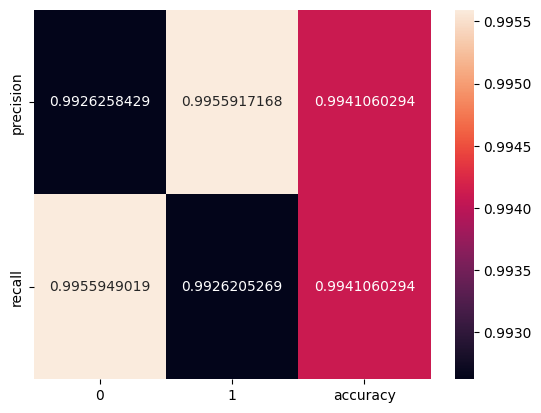

In [30]:
df_lgbm = pd.DataFrame(classification_report_lgbm)
df_xgboost = pd.DataFrame(classification_report_xgboost)
df_randomforest = pd.DataFrame(classification_report_randomforest)

df_heatmaplgbm = df_lgbm.iloc[:2, :3]
df_heatmapxgboost = df_xgboost.iloc[:2, :3]
df_heatmaprandomforest = df_randomforest.iloc[:2, :3]

import seaborn as sns

sns.heatmap(df_heatmaplgbm, annot=True , fmt='.10f')


<Axes: >

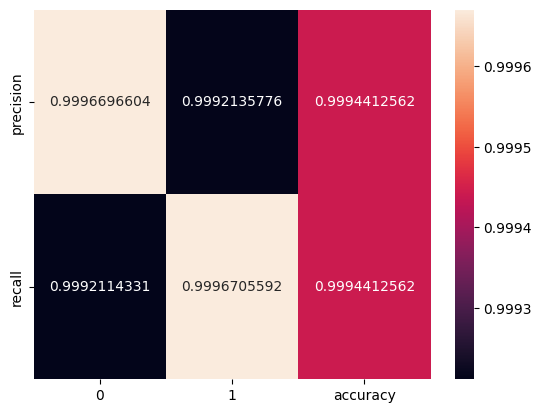

In [28]:
sns.heatmap(df_heatmapxgboost, annot=True , fmt='.10f')


<Axes: >

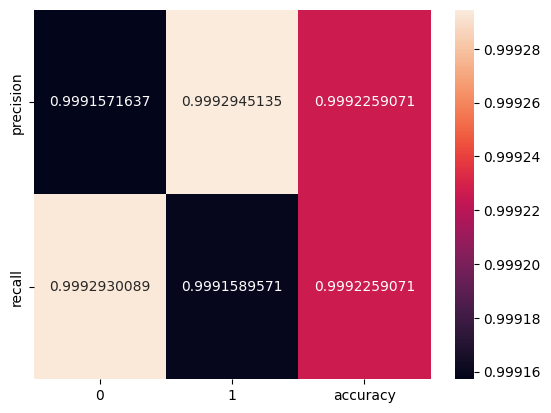

In [29]:
sns.heatmap(df_heatmaprandomforest, annot=True, fmt='.10f')